##Medical Health Insurance Cost Analysis and Prediction

Dataset - https://www.kaggle.com/mirichoi0218/insurance

Columns

1. age: age of primary beneficiary <br>
2. sex: insurance contractor gender, female, male <br>
3. bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9 <br>
4. children: Number of children covered by health insurance / Number of dependents <br>
5. smoker: Smoking <br>
6. region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest. <br>
7. charges: Individual medical costs billed by health insurance

In [1]:
# Importing the necessary modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading and exploring the dataset
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Project_Akhir_Iim Abdul Mafahir_OJT_Data Science Batch 20/insurance.csv')

In [4]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
#Rows and Columns
print('Number of rows:', df.shape[0], " ", 'Number of columns:', df.shape[1])

Number of rows: 1338   Number of columns: 7


In [6]:
# Detail of Columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Berdasarkan hasil dari info, saya melihat bahwa tidak ada nilai null dalam data dan tidak ada tipe data kolom yang berbeda

In [7]:
#General statistical description of numerical variables
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


Berdasarkan hasil pendeskripsian, tampaknya ada data yang bersifat kategoris, tetapi ditetapkan sebagai tipe data integer/float.

In [8]:
# General statistical description of Categorical variables
df.describe(include=['object'])

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


Berdasarkan hasil dari deskripsi, kami juga melihat variabel-variabel ini berada di atas dan lebih sering dalam dataset: laki-laki, bukan perokok, wilayah tenggara

### Visualizing The Data
#### Distribution of charge

Text(0.5, 1.0, 'Distribution of Natural Log')

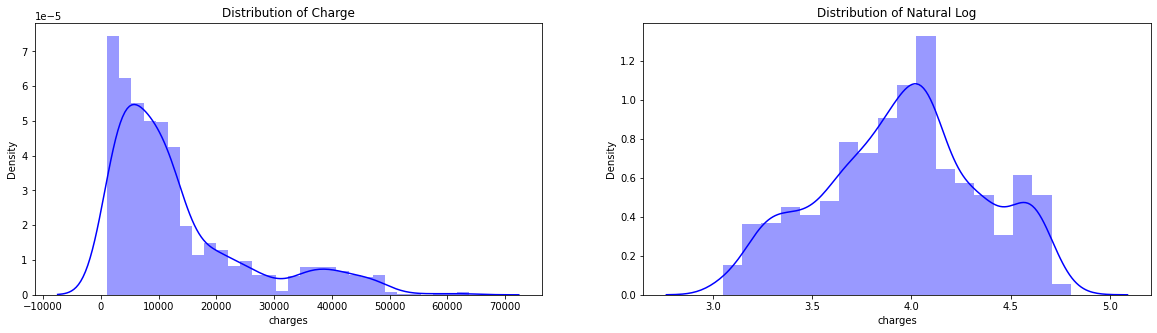

In [9]:
# Distribution of the charges
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.distplot(df.charges, color='b').set_title('Distribution of Charge')

#Natural Log for approximately normal distribution
plt.subplot(1,2,2)
sns.distplot(np.log10(df.charges), color='b').set_title('Distribution of Natural Log')


Catatan: Distribusi muatan miring ke kanan, jadi saya menggunakan log natural untuk ~ distribusi normal.

Text(0.5, 1.0, 'Distribution of Charges')

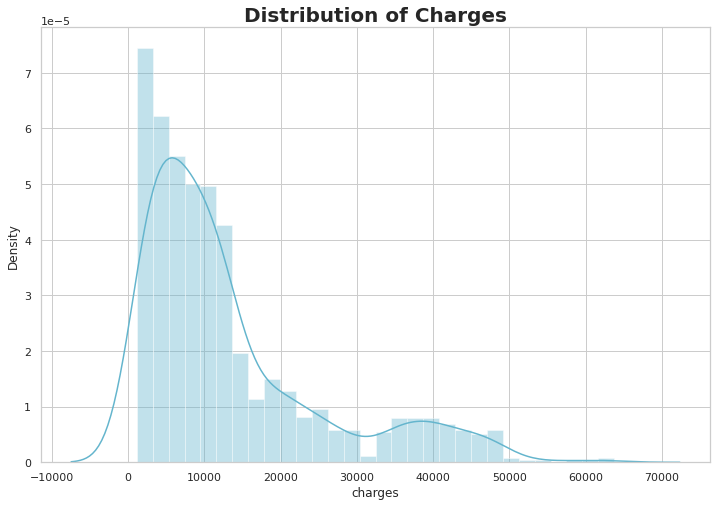

In [10]:
# Distribution of Medical charges

sns.set(style='whitegrid')
f, ax = plt.subplots(1,1, figsize=(12, 8))
ax = sns.distplot(df['charges'], kde = True, color = 'c')
plt.title('Distribution of Charges',fontweight="bold", size=20)



*   Data Memiliki konsentrasi biaya yang tinggi di bawah $10.000 <br>

*   Biaya berkisar setinggi $65.000




#### Visualizing distribution of numerical variables vs medical charges

Text(0.5, 1.0, 'Distribution of BMI')

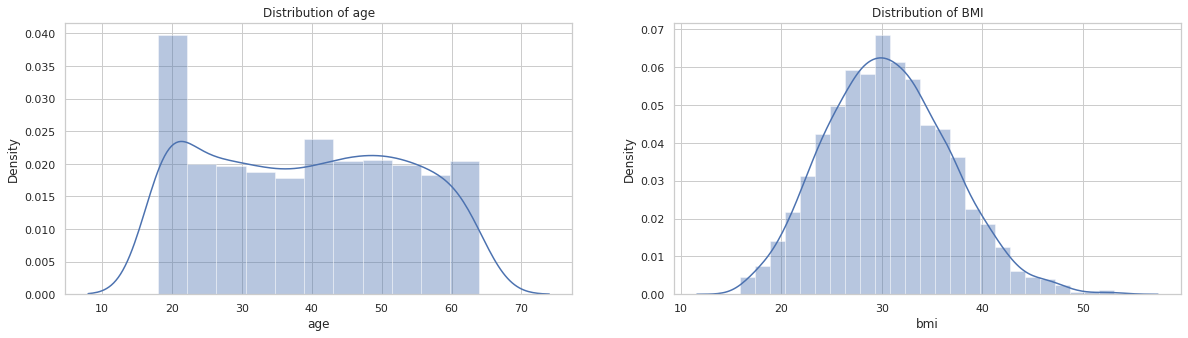

In [11]:
plt.figure(figsize = (20,5))
plt.subplot(1,2,1)
sns.distplot(df.age, color = 'b').set_title('Distribution of age')

plt.subplot(1,2,2)
sns.distplot(df.bmi, color = 'b').set_title('Distribution of BMI')



1.   Biaya medis individu yang ditagih oleh asuransi kesehatan paling tinggi pada usia 20 tahun
2.   Biaya medis tertinggi yang dibayarkan ke rumah sakit adalah orang orang yang memiliki bmi 30



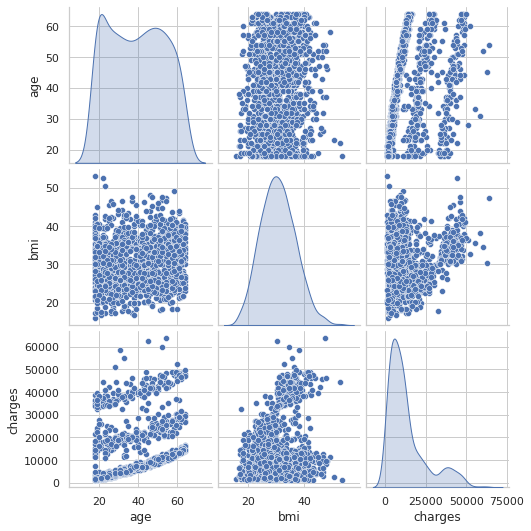

In [12]:
# Pairplot for Age, BMI, Charges
df_num = df[['age','bmi','charges']]
sns.pairplot(df_num, diag_kind = 'kde')
plt.show()

Pairplot mengungkapkan bahwa ada hubungan linier antara umur, bmi dengan biaya


#### Visualizing categorical variables individually vs medical charges

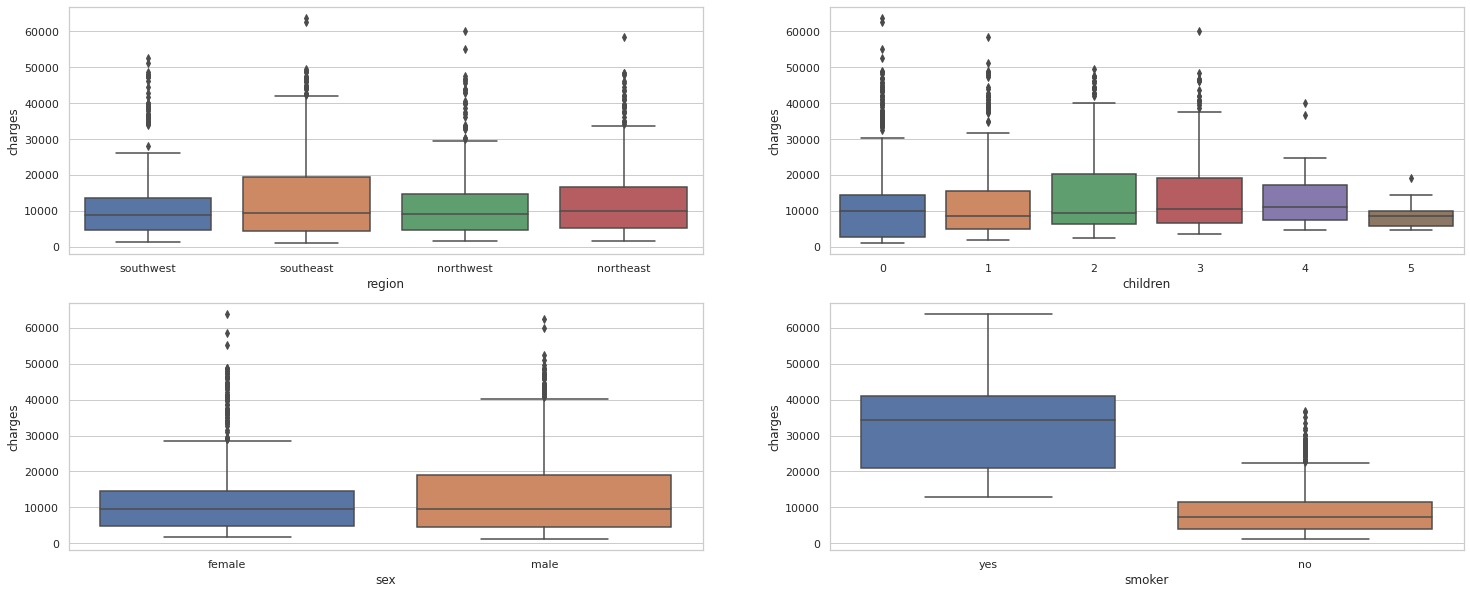

In [13]:
plt.figure (figsize = (25,10))
plt.subplot(2,2,1)
sns.boxplot(x = 'region', y = 'charges', data = df)

plt.subplot(2,2,2)
sns.boxplot(x = 'children', y = 'charges', data = df)

plt.subplot(2,2,3)
sns.boxplot(x = 'sex', y = 'charges', data = df)

plt.subplot(2,2,4)
sns.boxplot(x = 'smoker', y = 'charges', data = df)

Berdasarkan plot kotak di atas, kita dapat memperoleh beberapa kesimpulan tentang variabel kategori: <br>


*   Wilayah: Dibandingkan dengan semua wilayah, wilayah Tenggara memiliki distribusi data tertinggi antara persentil ke-50 dan ke-75.
*   Anak-anak: Di antara yang lainnya, individu dengan 2 anak memiliki distribusi tertinggi antara persentil ke-50 dan ke-75.
*   Jenis Kelamin: Data ini sedikit bias terhadap laki-laki karena rentang interkuartil untuk laki-laki lebih tinggi dibandingkan dengan perempuan. Representasi data laki-laki ke perempuan adalah 50,5 hingga 49,5.
*   Perilaku merokok: Sekitar 21% dari data kami terdiri dari perokok. Median tinggi untuk perokok, dibandingkan dengan mereka yang tidak merokok. <br>

Sekarang kita telah melihat efek dari variabel individu pada biaya medis, mari kita lihat efek dari kombinasi faktor pada biaya medis.







In [14]:
#Binning the age column

bins = [17,35,55,200]
slots = ['Young adult','Senior Adult','Elder']
df1 = df.copy()
df1['Age_range']=pd.cut(df1['age'],bins=bins,labels=slots)

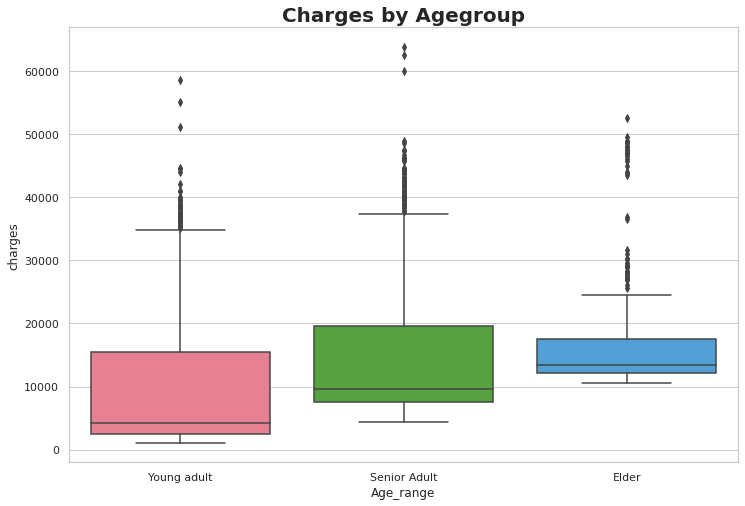

In [15]:
f, ax = plt.subplots(1, 1, figsize=(12, 8))
ax = sns.boxplot(x = 'Age_range', y = 'charges', data = df1, palette= 'husl')
plt.title('Charges by Agegroup',fontweight="bold", size=20)
plt.show()



*   Usia young adult berkisar antara 17 hingga 35 tahun,  senior adult berkisar antara 36-55 tahun dan Elder berusia di atas 55 tahun
*   Perbedaan harga antara kelompok umur terlihat jelas, tetapi tidak ekstrim



### Feature Engineering

In [16]:
df3=df.copy()

In [17]:
# Feature Engineering weight_status
df3['weight_status'] = np.where(df['bmi'] < 18.000, 'underweigth',
                               np.where(df['bmi'] < 25.000, 'normal',
                                       np.where(df['bmi'] < 30.000, 'overweight', 'obese')))
df3

,age,sex,bmi,children,smoker,region,charges,weight_status
0,19,female,27.900,0,yes,southwest,16884.92400,overweight
1,18,male,33.770,1,no,southeast,1725.55230,obese
2,28,male,33.000,3,no,southeast,4449.46200,obese
3,33,male,22.705,0,no,northwest,21984.47061,normal
4,32,male,28.880,0,no,northwest,3866.85520,overweight
...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,obese
1334,18,female,31.920,0,no,northeast,2205.98080,obese
1335,18,female,36.850,0,no,southeast,1629.83350,obese
1336,21,female,25.800,0,no,southwest,2007.94500,overweight


In [18]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            1338 non-null   int64  
 1   sex            1338 non-null   object 
 2   bmi            1338 non-null   float64
 3   children       1338 non-null   int64  
 4   smoker         1338 non-null   object 
 5   region         1338 non-null   object 
 6   charges        1338 non-null   float64
 7   weight_status  1338 non-null   object 
dtypes: float64(2), int64(2), object(4)
memory usage: 83.8+ KB


In [19]:
# Separating Categorical & Numerical Values
cats = ['sex', 'smoker', 'region', 'weight_status']
nums = ['age', 'bmi', 'children', 'charges']

In [20]:
## Describe Categorical Values
df3[cats].describe()

,sex,smoker,region,weight_status
count,1338,1338,1338,1338
unique,2,2,4,4
top,male,no,southeast,obese
freq,676,1064,364,707


In [21]:
## Describe Numerical Values
df3[nums].describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
## Check Smoker Feature
df3.groupby(['smoker'])['charges'].count()

smoker
no     1064
yes     274
Name: charges, dtype: int64

In [ ]:
## Check Sex Feature
df3.groupby(['sex'])['charges'].count()

sex
female    662
male      676
Name: charges, dtype: int64

In [ ]:
## Check Region Feature
df3.groupby(['region'])['charges'].count()

region
northeast    324
northwest    325
southeast    364
southwest    325
Name: charges, dtype: int64

In [ ]:
#Check Children Feature
df3.groupby(['children'])['charges'].count()

children
0    574
1    324
2    240
3    157
4     25
5     18
Name: charges, dtype: int64

In [ ]:
## Check Weight_Status Feature
df3.groupby(['weight_status'])['charges'].count()

weight_status
normal         230
obese          707
overweight     386
underweigth     15
Name: charges, dtype: int64

#### Visualization Approach

In [ ]:
# Visualization Plot Settings
sns.set(rc={'figure.figsize':(15,5)})
sns.set_style('whitegrid')
sns.color_palette('viridis')
plt.style.use('seaborn-bright')

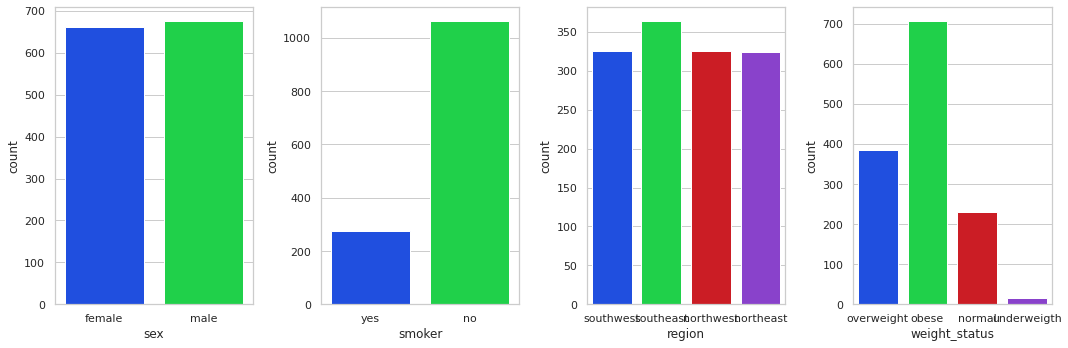

In [ ]:
for i in range(0, len(cats)):
    plt.subplot(1, len(cats), i + 1)
    sns.countplot(df3[cats[i]])
    plt.tight_layout()

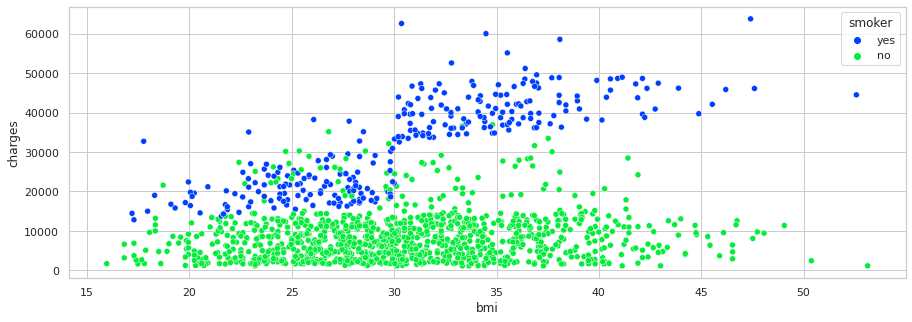

In [ ]:
sns.scatterplot(x = 'bmi', y = 'charges', hue = 'smoker', data = df)

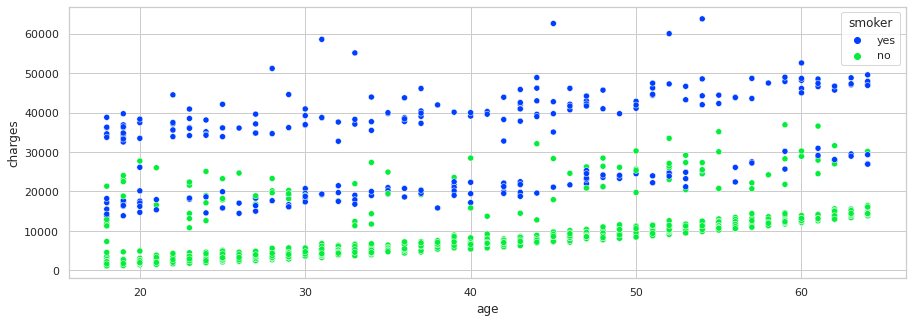

In [ ]:
sns.scatterplot(x = 'age', y = 'charges', hue = 'smoker', data = df)

In [ ]:
#Count Weight_Status with Hue Smoker
smoker_status = df3.groupby(['weight_status', 'smoker']).agg({'charges' : 'count'}).reset_index()
smoker_status.columns = ('weight_status', 'smoker', 'count')
smoker_status

,weight_status,smoker,count
0,normal,no,179
1,normal,yes,51
2,obese,no,562
3,obese,yes,145
4,overweight,no,312
5,overweight,yes,74
6,underweigth,no,11
7,underweigth,yes,4


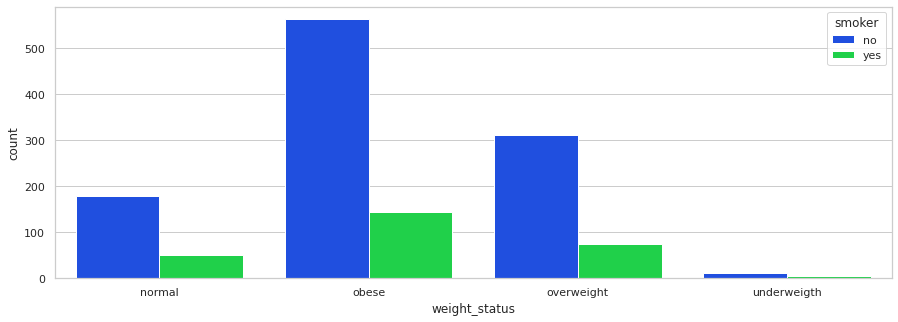

In [ ]:
#Barplot Smoker_Status
sns.barplot(x = 'weight_status', y = 'count', hue = 'smoker', data = smoker_status)

In [ ]:
#Check Children Feature
df3.groupby(['children'])['charges'].count()

children
0    574
1    324
2    240
3    157
4     25
5     18
Name: charges, dtype: int64

In [ ]:
## Check Weight_Status Feature
df3.groupby(['weight_status'])['charges'].count()

weight_status
normal         230
obese          707
overweight     386
underweigth     15
Name: charges, dtype: int64

#### Bi-Variate Analysis
##### Charges by region

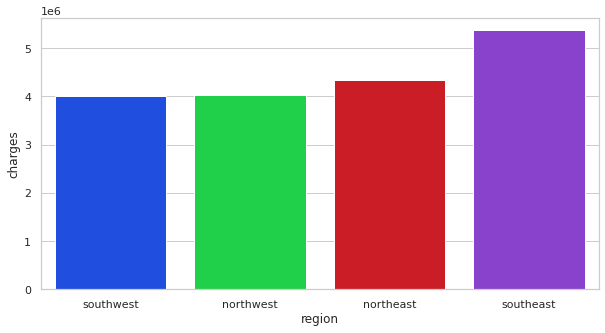

In [ ]:
charges = df['charges'].groupby(df.region).sum().sort_values(ascending = True)
plt.figure(figsize=(10,5))
ax = sns.barplot(x = charges.index, y = charges)

Jumlah biaya tertinggi berada di Southeast  sedangkan yang terendah berada di Southwest. Berdasarkan hal ini, mari kita lihat bagaimana biaya berubah menurut wilayah saat memperhitungkan faktor lain, seperti jumlah anak, jenis kelamin, dan perilaku merokok.

### Charges by region and number of children

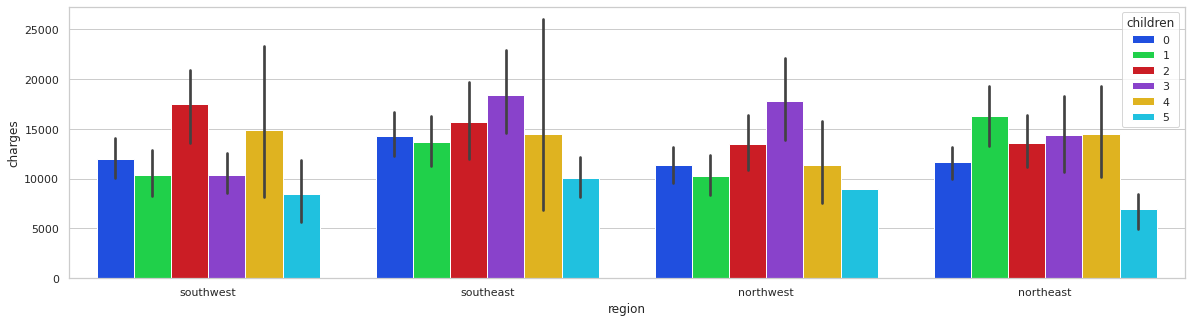

In [ ]:
# Setting children as hue parameter
plt.figure(figsize=(20,5))
ax = sns.barplot(x = 'region', y = 'charges', hue = 'children', data = df)

Tampaknya tidak ada perbedaan statistik dalam hal pengaruh jumlah anak di wilayah tertentu terhadap biaya.

#### Charges by region and gender

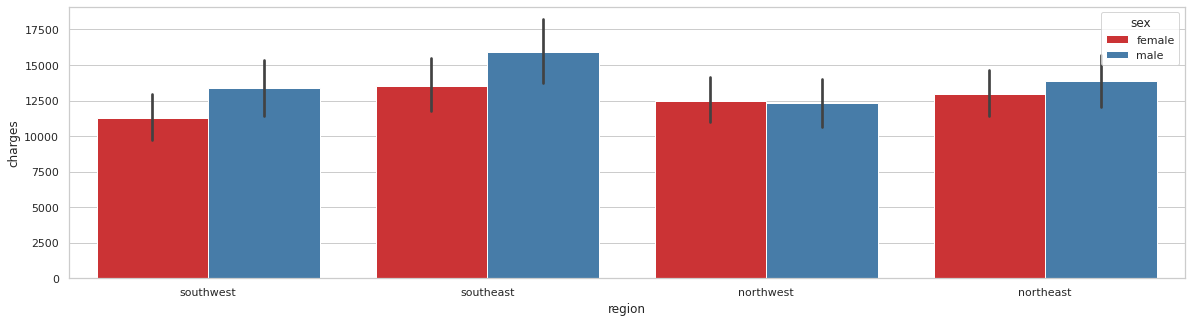

In [ ]:
# setting Sex as Hue parameter
plt.figure(figsize=(20,5))
sns.barplot(x = 'region', y = 'charges', hue = 'sex', data = df, palette = 'Set1')

Sekali lagi, mirip dengan grafik sebelumnya, tampaknya tidak ada perbedaan statistik dalam hal pengaruh gender di wilayah tertentu terhadap biaya.

#### Charges by region and smoking behavior

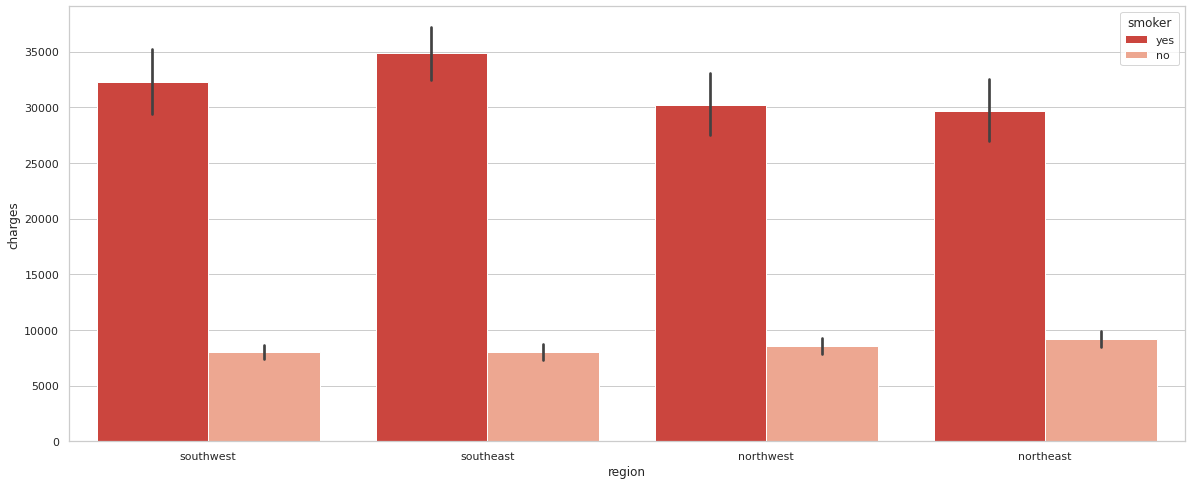

In [ ]:
f, ax = plt.subplots(1, 1, figsize = (20, 8))
ax = sns.barplot(x = 'region', y = 'charges', hue = 'smoker', data = df, palette = 'Reds_r')


Berbeda dengan faktor lain, tampaknya ada signifikansi statistik dalam hal bagaimana perilaku merokok di suatu wilayah mempengaruhi biaya.

Dari grafik batang ini, kita dapat melihat bahwa perilaku merokok menurut wilayah secara signifikan mempengaruhi biaya medis. Nah, mari kita lihat korelasi antara variabel non kategori (umur, bmi, dan anak) dengan biaya pengobatan (dinilai berdasarkan perilaku merokok).

#### Charges by age, bmi, and children based on smoking behavior

Text(0.5, 1.0, 'Number of children vs Medical Charges')

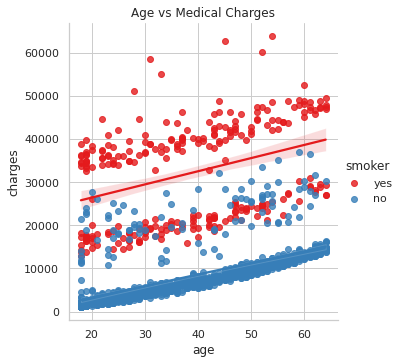

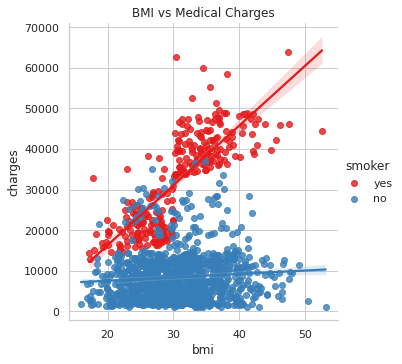

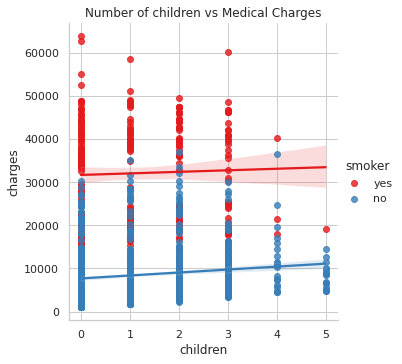

In [ ]:
ax = sns.lmplot(x = 'age', y = 'charges', data = df, hue = 'smoker', palette = 'Set1')
plt.title('Age vs Medical Charges')

ax = sns.lmplot(x = 'bmi', y = 'charges', data = df, hue = 'smoker', palette = 'Set1')
plt.title('BMI vs Medical Charges')

ax = sns.lmplot(x = 'children', y = 'charges', data = df, hue = 'smoker', palette = 'Set1')
plt.title('Number of children vs Medical Charges')

Berdasarkan analisis tersebut,


*   Kita tahu bahwa merokok berdampak besar pada biaya pengobatan.
*   Merokok yang dikombinasikan dengan peningkatan faktor lain, seperti usia, bmi, dan anak-anak, semakin mempertegas dan meningkatkan biaya pengobatan akibat merokok.



### Data Correlation
To confirm our findings, let's look at the correlation between all the columns by constructing a pairplot and correlation heatmap. <br>

In order to do so, we need to first convert all object labels into categorical variables and then convert them to numerical values.

In [ ]:
# Converting data to categorical type data
df[['region','sex','smoker']] = df[['region','sex','smoker']].astype('category')
df.dtypes

age            int64
sex         category
bmi          float64
children       int64
smoker      category
region      category
charges      float64
dtype: object

In [ ]:
# Converting Data to numerical type using LabelEncoder
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()

label.fit(df.region.drop_duplicates())
df.region = label.transform(df.region)

label.fit(df.sex.drop_duplicates())
df.sex = label.transform(df.sex)

label.fit(df.smoker.drop_duplicates())
df.smoker = label.transform(df.smoker)

df.dtypes

age           int64
sex           int64
bmi         float64
children      int64
smoker        int64
region        int64
charges     float64
dtype: object

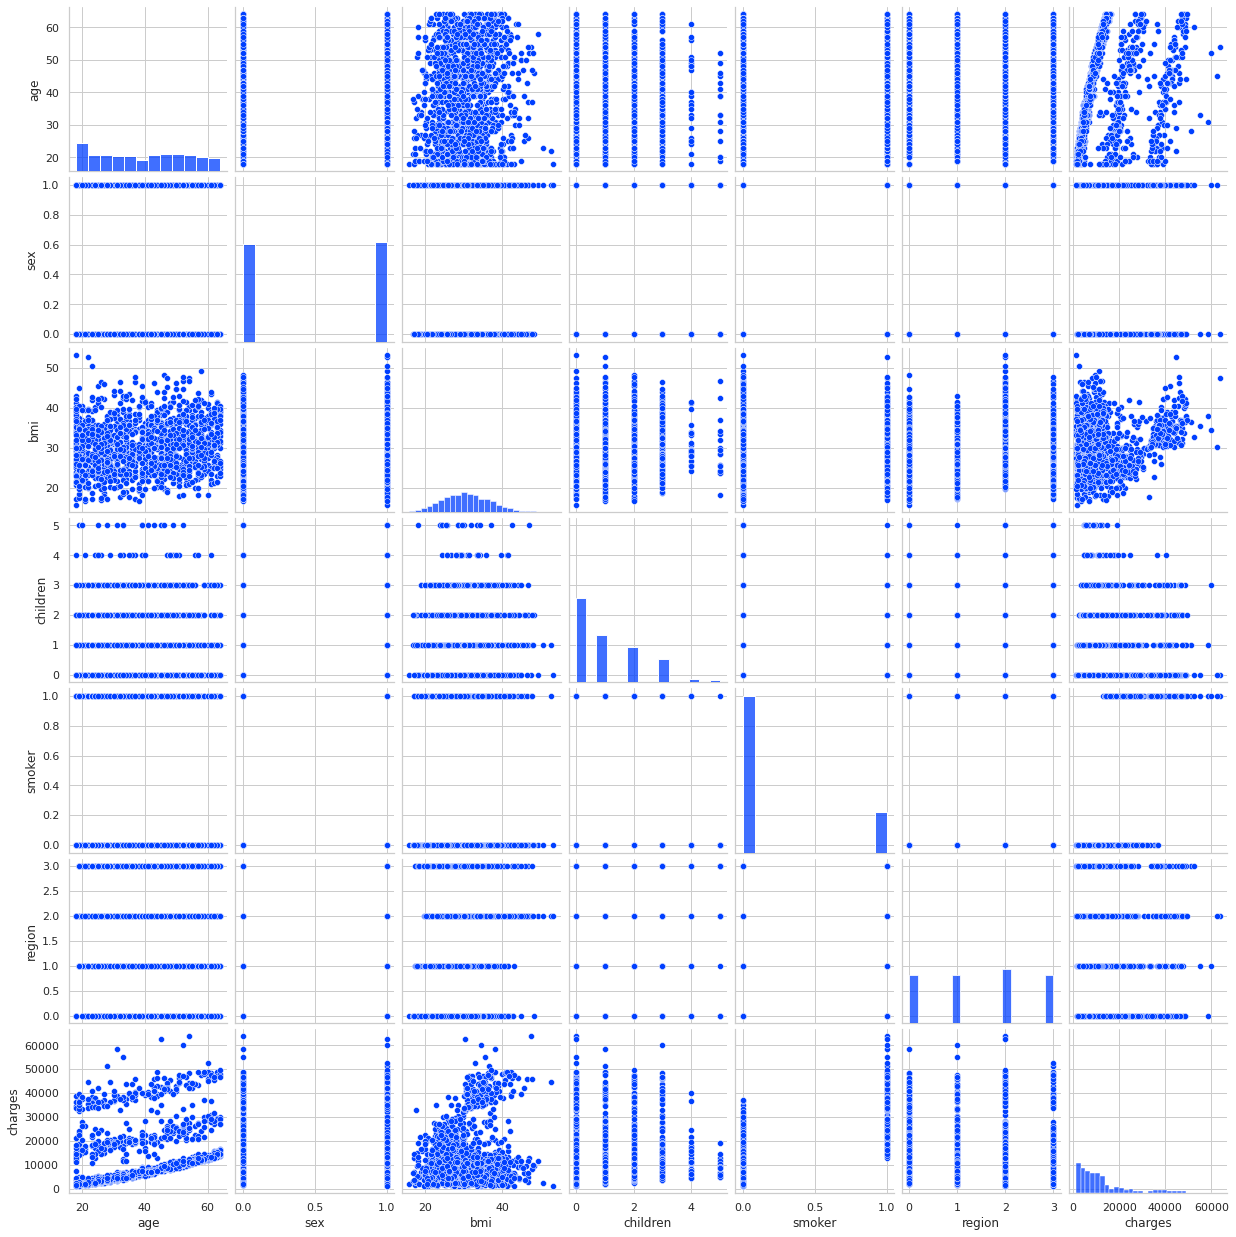

In [ ]:
sns.pairplot(df)

Text(0.5, 1.0, 'Correlation Factors Heat Map')

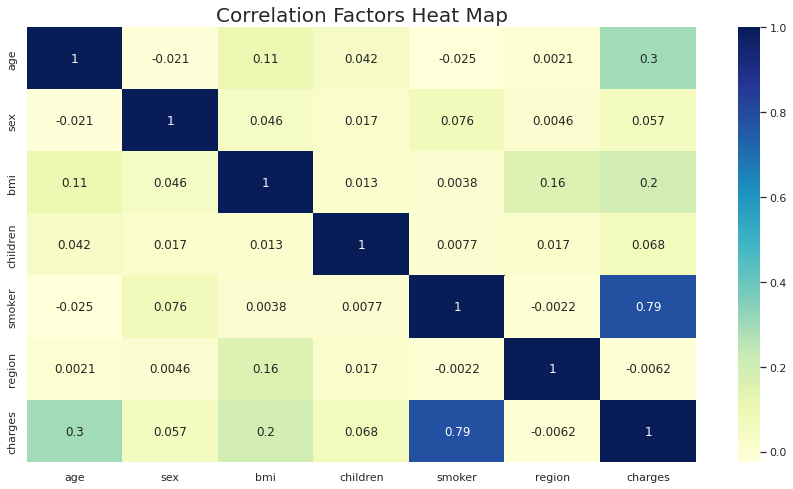

In [ ]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(), annot = True, cmap = 'YlGnBu').set_title('Correlation Factors Heat Map', size = '20')



*   Heatmap menunjukkan variabel yang bersifat multikolinear dan variabel yang memiliki kolinearitas tinggi dengan variabel target (Charges).
*   
Hal ini menunjukkan bahwa perilaku merokok yang diikuti usia dan bmi sangat berkorelasi dengan biaya pengobatan.





## **Preparing Data for Machine Learning**
Sekarang setelah memahami data set, sekarang saatnya menerapkan metode machine learning untuk memprediksi biaya asuransi pasien di masa mendatang berdasarkan beberapa faktor. <br>

Pertama, kita harus menyiapkan data kita dengan membaginya menjadi data training dan testing.

#### Splitting the Features and Target

In [ ]:
from sklearn.model_selection import train_test_split as holdout
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [ ]:
features = df.drop(['charges'], axis = 1)
targets = df['charges']

In [ ]:
x_train, x_test, y_train, y_test = holdout(features, targets, test_size = 0.2, random_state = 0)

#### Machine Learning

Tujuannya adalah untuk menentukan biaya asuransi bagi seorang individu berdasarkan beberapa faktor. Oleh karena itu, ini adalah kasus regresi. Model regresi nilai prediksi target berdasarkan variabel independen. Kami akan menggunakan algoritma berikut 



1.   Linier Regression
2.   Random forest regressor
3.   Polynomial Regression





### Preprocessing the data (Data cleaning, Feature Transformation, Feature Scaling (Normalization))

#### Data Clean

In [ ]:
## Missing Value
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [ ]:
## Check duplicate
df.duplicated().sum()

1

In [ ]:
#Remove Duplicate Value
df = df.drop_duplicates()

#Check Duplicate Value
df.duplicated().sum()

0

#### Feature Tansformation

In [ ]:
## Check Weight_Status Feature
df3.groupby(['weight_status'])['charges'].count()

weight_status
normal         230
obese          707
overweight     386
underweigth     15
Name: charges, dtype: int64

#### Encoding the categorical features

In [ ]:
# encoding sex column
df.replace({'sex':{'male':0,'female':1}}, inplace=True)

3 # encoding 'smoker' column
df.replace({'smoker':{'yes':0,'no':1}}, inplace=True)

# encoding 'region' column
df.replace({'region':{'southeast':0,'southwest':1,'northeast':2,'northwest':3}}, inplace=True)

In [ ]:
print(x)

      age     sex     bmi  children smoker     region weight_status
0      19  female  27.900         0    yes  southwest    overweight
1      18    male  33.770         1     no  southeast         obese
2      28    male  33.000         3     no  southeast         obese
3      33    male  22.705         0     no  northwest        normal
4      32    male  28.880         0     no  northwest    overweight
...   ...     ...     ...       ...    ...        ...           ...
1333   50    male  30.970         3     no  northwest         obese
1334   18  female  31.920         0     no  northeast         obese
1335   18  female  36.850         0     no  southeast         obese
1336   21  female  25.800         0     no  southwest    overweight
1337   61  female  29.070         0    yes  northwest    overweight

[1338 rows x 7 columns]


In [ ]:
print(y)

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


####Splitting the data into Training data & Testing Data

In [ ]:
print(x.shape, x_train.shape, x_test.shape)

(1338, 7) (1070, 6) (268, 6)


#### Model Training

### 1. Linier Regression

In [ ]:
Lin_reg_model = LinearRegression()
Lin_reg_model.fit(x_train, y_train)

print('Intercept:', Lin_reg_model.intercept_)
print('Coefficients:', Lin_reg_model.coef_)

Intercept: -11661.98390882441
Coefficients: [  253.99185244   -24.32455098   328.40261701   443.72929547
 23568.87948381  -288.50857254]


In [ ]:
from sklearn.metrics import r2_score, mean_squared_error

Lin_reg_model_train_pred = Lin_reg_model.predict(x_train)
Lin_reg_model_test_pred = Lin_reg_model.predict(x_test)

# Mean squared error
Lin_reg_model_train_mse = mean_squared_error(y_train, Lin_reg_model_train_pred)
Lin_reg_model_test_mse = mean_squared_error(y_test, Lin_reg_model_test_pred)
print('MSE train data: {:.3}, \nMSE test data: {:.3}\n'.format(Lin_reg_model_train_mse, Lin_reg_model_test_mse))

# Root Mean Squared error
print('RMSE train data: {:.3}, \nRMSE test data: {:.3}\n'.format(
    np.sqrt(np.absolute(Lin_reg_model_train_mse)), 
    np.sqrt(np.absolute(Lin_reg_model_train_mse))))

# R^2 - coefficient of determination
print('R2 train data: {:.3}, \nR2 test data: {:.3}\n'.format(
    r2_score(y_train,Lin_reg_model_train_pred),
    r2_score(y_test,Lin_reg_model_test_pred)))

# Model Score
print('Model Score:', Lin_reg_model.score(x_test, y_test))

MSE train data: 3.77e+07, 
MSE test data: 3.18e+07

RMSE train data: 6.14e+03, 
RMSE test data: 6.14e+03

R2 train data: 0.737, 
R2 test data: 0.8

Model Score: 0.7998747145449959


Skor model yang kami capai menghasilkan prediksi yang relatif baik; namun, kami dapat meningkatkan model dengan mengabaikan variabel independen yang sangat penting.

### 2. Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor as rfr

RFR = rfr(n_estimators = 100, criterion = 'mse', random_state = 0, n_jobs = -1)
RFR.fit(x_train, y_train)

x_train_predic = RFR.predict(x_train)
x_test_predic = RFR.predict(x_test)

# Mean squared error
train_mse = metrics.mean_squared_error(x_train_predic, y_train)
test_mse = metrics.mean_squared_error(x_test_predic, y_test)
print('Mean Squared Error train data: %.3f\nMean Squared Error test data: %.3f\n' % (train_mse, test_mse))

# Root Mean Squares error
print('RMSE train data: {:.3}, \nRMSE test data: {:.3}\n'.format(
    np.sqrt(np.absolute(train_mse)), 
    np.sqrt(np.absolute(train_mse))))

# R^2 - coefficient of determination
print('R2 train data: %.3f\nR2 test data: %.3f\n' % (metrics.r2_score(x_train_predic, y_train),metrics.r2_score(x_test_predic, y_test)))

# Model Score
print('Model Accuracy Score:', (RFR.score(x_test, y_test))*100)

Mean Squared Error train data: 3778409.061
Mean Squared Error test data: 20561948.169

RMSE train data: 1.94e+03, 
RMSE test data: 1.94e+03

R2 train data: 0.971
R2 test data: 0.861

Model Accuracy Score: 87.0785187973657


Skor model yang dihasilkan merupakan peningkatan dari model sebelumnya!

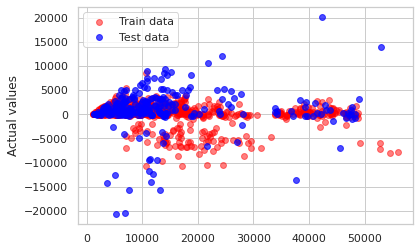

In [ ]:
## Plotting actual vs predicted values from random forest regressor

plt.figure(figsize = (6, 4))

# Train data
plt.scatter(x_train_predic, x_train_predic - y_train, c = 'red', marker = 'o', s = 35, alpha = 0.5, label = 'Train data')
# Test data
plt.scatter(x_test_predic, x_test_predic - y_test, c = 'blue', marker = 'o', s = 35, alpha = 0.7, label = 'Test data')


# plt.xlabel("Predicted values")
plt.ylabel('Actual values')
plt.legend(loc = 'upper left')

Sekarang setelah kita memiliki grafik nilai aktual vs prediksi, mari kita lihat fitur yang sangat berkontribusi terhadap prediksi. Kita dapat melakukannya dengan melakukan pemeringkatan kepentingan fitur.


*  The feature importance method for Random Forests mampu menarik kesimpulan tentang fitur apa yang paling berkontribusi pada pengambilan keputusan dalam model dan membantu pengguna untuk lebih memahami driver di balik model.



### Feature Importance Ranking

1.smoker(0.606920)
2.bmi(0.215579)
3.age(0.136042)
4.children(0.021231)
5.region(0.014214)
6.sex(0.006014)


<BarContainer object of 6 artists>

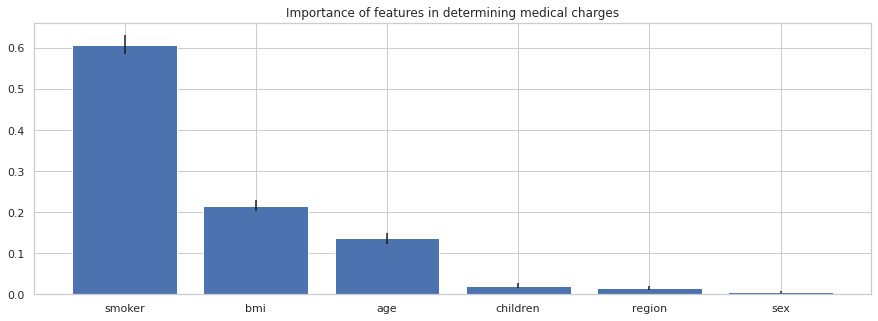

In [ ]:
importances = RFR.feature_importances_
std = np.std([tree.feature_importances_ for tree in RFR.estimators_], axis = 0)

indices = np.argsort(importances)[::-1]
variables = ['age', 'sex','bmi', 'children','smoker','region']

imp_list = []
for value in range(features.shape[1]):
    variable = variables[indices[value]]
    imp_list.append(variable)
    print('%d.%s(%f)' % (value + 1, variable, importances[indices[value]]))
    
# Plotting the feature importances
plt.figure()
plt.title('Importance of features in determining medical charges')
plt.bar(imp_list, importances[indices], color = 'b', yerr = std[indices], align = 'center')

Based on the feature importances, kita dapat melihat bahwa variabel independen jenis kelamin dan wilayah tidak terlalu penting dalam menentukan biaya medis/biaya asuransi untuk seorang individu. Oleh karena itu, kita dapat mengeliminasi variabel tersebut dan menghasilkan model lain untuk memprediksi biaya asuransi tanpa memperhitungkan variabel tersebut. Kami hanya memilih 2 variabel dengan kontribusi terendah untuk dihilangkan karena tidak akurat untuk menghapus terlalu banyak variabel independen yang berpotensi tidak penting saat membuat model.

#### Polynomial Regression
Menyiapkan kembali data dengan menghilangkan variabel yang tidak penting dan membagi data menjadi data training dan data testing.

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
features = df.drop(['charges','sex','region'], axis = 1)
target = df.charges

pol = PolynomialFeatures (degree = 2)
x_pol = pol.fit_transform(features)
x_train, x_test, y_train, y_test = holdout(x_pol, target, test_size = 0.2, random_state = 0)

In [ ]:
Pol_reg = LinearRegression()
Pol_reg.fit(x_train, y_train)

y_train_predic = Pol_reg.predict(x_train)
y_test_predic = Pol_reg.predict(x_test)

print('Intercept:', Pol_reg.intercept_)
print('Coefficients:', Pol_reg.coef_)

# Model Score
print('\nModel Accuracy Score:', (Pol_reg.score(x_test, y_test))*100)

#### Best Algorithm:
Based on the perfomed machine learning algorithms, tampaknya Regresi Polinomial setelah menghilangkan dua variabel independen yang tidak penting menghasilkan metode yang paling akurat dan akan digunakan untuk memprediksi biaya asuransi untuk seorang individu.



*   Polynomial Regression: 88%
*   Random Forest Regressor: 87%
*   Linear Regression: 80%



In [ ]:
#Independent variables
features.head()

,age,bmi,children,smoker
0,19,27.900,0,1
1,18,33.770,1,0
2,28,33.000,3,0
3,33,22.705,0,0
4,32,28.880,0,0


In [ ]:
#Dependent variable
targets.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [ ]:
#Predicting the Medical Charges
y_test_predic = Pol_reg.predict(x_test)

# Creating a dataframe for comparing the Actual Values with the Predicted Values
final_values = pd.DataFrame({'Actual values': y_test, 'Predicted values': y_test_predic})
final_values

,Actual values,Predicted values
1248,1633.96180,2687.454432
610,8547.69130,10135.037321
393,9290.13950,10754.902954
503,32548.34050,26162.873761
198,9644.25250,9141.656812
...,...,...
809,3309.79260,5013.664929
726,6664.68595,8460.233673
938,2304.00220,4822.210691
474,25382.29700,29294.007454
